In [1]:
from upit.data.unpaired import *
from upit.models.cyclegan import *
from upit.train.cyclegan import *
from upit.inference.cyclegan import *
from fastai.vision.all import *


In [3]:
import torch
torch.cuda.set_device(2)

In [4]:
trainA_path = Path('corr/hc/')
trainB_path = Path('corr/schz/')
print(f"There are {len(trainA_path.ls())} normal images")
print(f"There are {len(trainB_path.ls())} abnormal images")

There are 52 normal images
There are 50 abnormal images


In [10]:
dls = get_dls(trainA_path, trainB_path,load_size=120,crop_size=120)

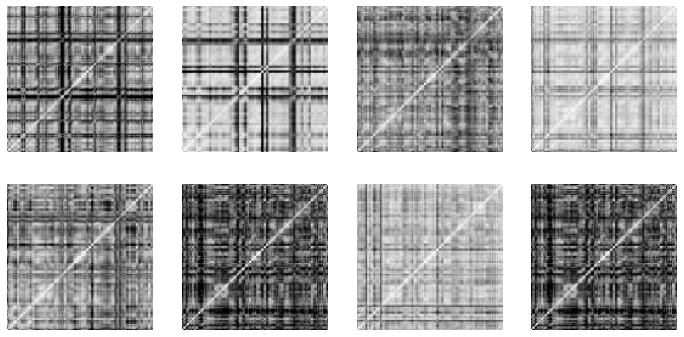

In [11]:
dls.show_batch()

In [12]:
cycle_gan = CycleGAN(3,3,64,gen_blocks=3)

In [13]:
learn = cycle_learner(dls, cycle_gan,opt_func=partial(Adam,mom=0.5,sqr_mom=0.999),show_img_interval=8)

/home/jonathan/.virtualenvs/segmentation/lib/python3.6/site-packages/fastprogress/fastprogress.py:74: UserWarning: Your generator is empty.
  warn("Your generator is empty.")
/home/jonathan/.virtualenvs/segmentation/lib/python3.6/site-packages/fastai/learner.py:55: UserWarning: Could not load the optimizer state.
  if with_opt: warn("Could not load the optimizer state.")


SuggestedLRs(lr_min=5.754399462603033e-05, lr_steep=0.00019054606673307717)

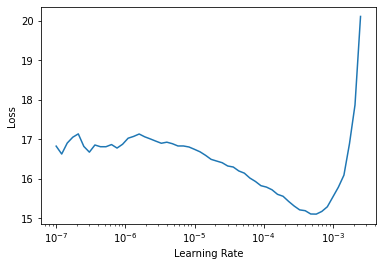

In [14]:
learn.lr_find()

epoch,train_loss,id_loss_A,id_loss_B,gen_loss_A,gen_loss_B,cyc_loss_A,cyc_loss_B,D_A_loss,D_B_loss,time
0,14.172997,2.075260,2.093721,0.958936,0.686267,4.194366,4.269711,0.524789,0.524789,00:02
1,12.851276,1.792848,1.840447,0.411378,0.374427,3.633613,3.810523,0.278794,0.278794,00:02
2,12.075327,1.670206,1.694624,0.389239,0.368360,3.401863,3.502411,0.257021,0.257021,00:02
3,11.345283,1.550729,1.489524,0.379120,0.350176,3.171015,3.091161,0.240930,0.240930,00:02
4,10.793581,1.451199,1.446541,0.372147,0.338329,2.975408,2.994516,0.234103,0.234103,00:02
5,10.413344,1.413752,1.467218,0.366656,0.338738,2.891725,3.004428,0.243246,0.243246,00:02
6,10.040350,1.414543,1.320639,0.346031,0.341629,2.891257,2.729784,0.238963,0.238963,00:02
7,9.688369,1.321335,1.303166,0.350902,0.333500,2.712522,2.682468,0.236523,0.236523,00:02
8,9.514061,1.326022,1.403430,0.350441,0.338157,2.714954,2.884593,0.230494,0.230494,00:01


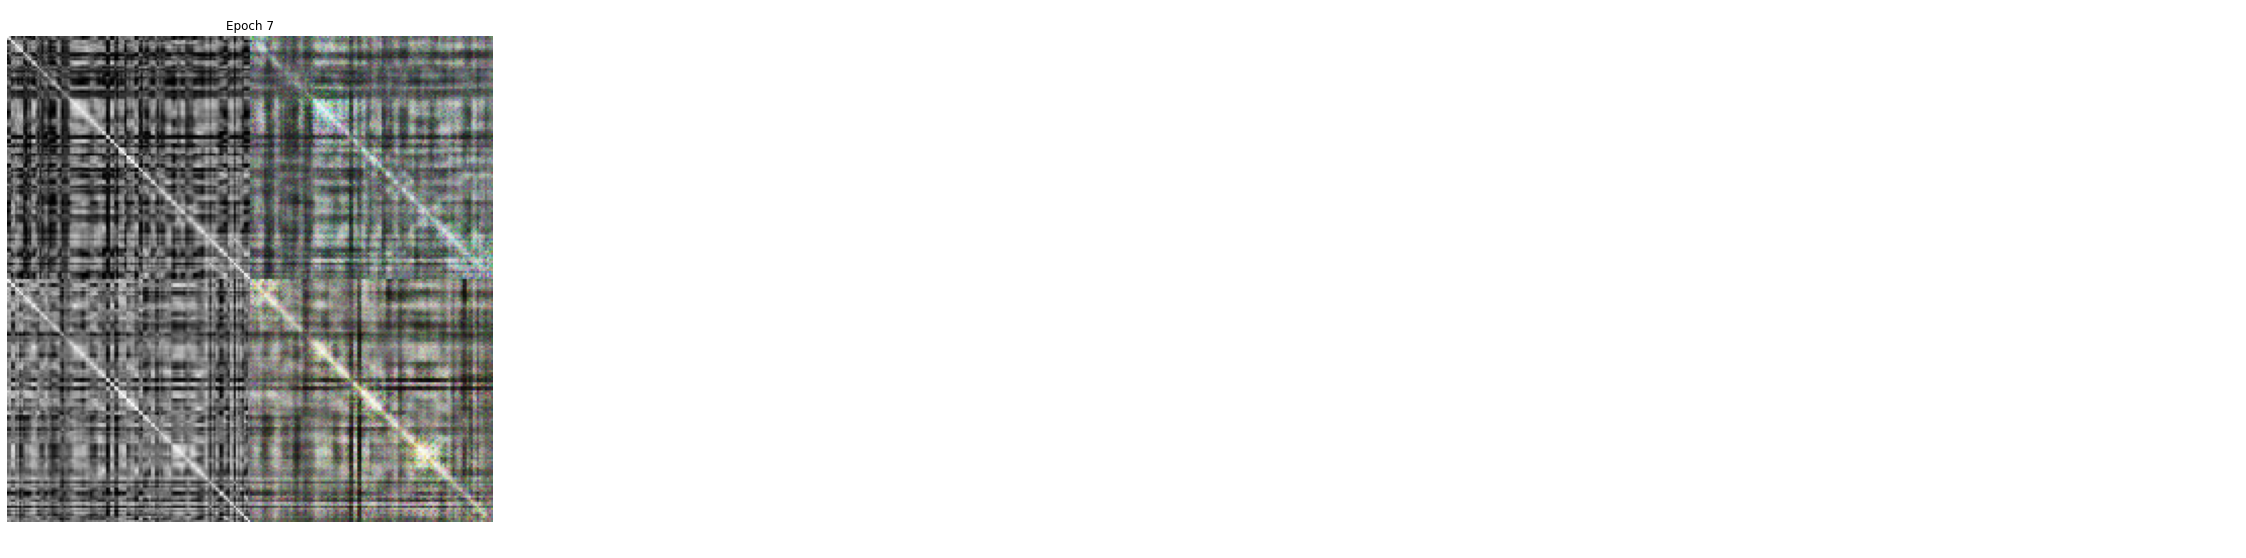

In [ ]:
learn.fit_flat_lin(7,7,2e-4)

In [17]:
pred_pathAbnormal = 'corrCycleGAN/schz'

In [19]:
get_preds_cyclegan(learn, 'corr/hc/', pred_pathAbnormal)

In [10]:
pred_pathNormal = 'corrCycleGAN/hc'

In [11]:
get_preds_cycleganB(learn, 'corr/schz/', pred_pathNormal)

In [22]:
??get_preds_cyclegan

In [6]:
learn.load('cycleganNormal2Abnormal')

/home/jonathan/.virtualenvs/segmentation/lib/python3.6/site-packages/fastai/learner.py:53: UserWarning: Could not load the optimizer state.
  if with_opt: warn("Could not load the optimizer state.")


In [8]:
import torchvision
def get_preds_cycleganB(learn,test_path,pred_path,bs=4,num_workers=4,suffix='tif'):
    """
    A prediction function that takes the Learner object `learn` with the trained model, the `test_path` folder with the images to perform
    batch inference on, and the output folder `pred_path` where the predictions will be saved, with a batch size `bs`, `num_workers`,
    and suffix of the prediction images `suffix` (default='png').
    """

    assert os.path.exists(test_path)

    if not os.path.exists(pred_path):
        os.mkdir(pred_path)

    test_dl = load_dataset(test_path,bs,num_workers)
    model = learn.model.G_A.cuda()
    for i, xb in progress_bar(enumerate(test_dl),total=len(test_dl)):
        fn, im = xb
        preds = (model(im.cuda())/2 + 0.5)
        for i in range(len(fn)):
            new_fn = os.path.join(pred_path,'.'.join([os.path.basename(fn[i]).split('.')[0]+'_fakeB',suffix]))
            torchvision.utils.save_image(preds[i],new_fn)

In [28]:
export_generator(learn,convert_to='B')

In [30]:
export_generator(learn,generator_name='generatorA',convert_to='A')